In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import xarray as xr


In [2]:
CLT_t_ = [160, 180, 200, 220, 240, 260, 280, 300]
GL_b_ = [ 280, 320, 340, 360, 380, 400, 420, 440, 480, 500, 520, 540, 560, 580, 600 ] 
GL_h_ = [320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800 ]

In [3]:
# Frame Geometry
L_X = 30000
L_Y = 40000

N_X = np.array([3,4,5,6,7,8,9,10])
N_Y = np.array([3,4,5,6,7,8,9,10])

Dx = L_X/(N_X-1)
Dy = L_Y/(N_Y-1)

In [4]:
# Loads
q_DL_d = 2 # kN/m^2
q_LL_d = 2.55 # kN/m^2
q_DL_facade = 2 # kN/m

In [5]:
# Load coefficients
#ULS
gamma_ULS_DL = 1.35
gamma_ULS_LL_A = 1.5

Psi_LL_B = [0.7, 0.5, 0.3]
#SLS - characteristic/rare

gamma_SLSc_DL = 1.0
gamma_SLSc_LL_A = 1.0

#SLS - Quasi permanent
gamma_SLSqp_DL = 1.0
gamma_SLSqp_LL_A = 1.0

#SLS - Frequent
gamma_SLSf_DL = 1.0
gamma_SLSf_LL_A = 1.0

# Material

In [6]:
# Material 

# CLT
Mat_01 = 'GL24h'
fm_k = 24 # MPa
ft_0_k = 14 # MPa
ft_90_k = 0.12 # MPa
fc_0_k = 21 # MPa
fc_90_k = 2.5 # MPa
fv_k = 4 # MPa
Em_0_mean = 12000 # MPa
#Em_90_mean = 1
#Em_0_mean = 1
G_mean = 690 # MPa


# Glulam GL24h
GL24h = {
"fm_k" : 24 , # MPa,
"ft_0_k" : 19.2, # MPa
"ft_90_k" : 0.5 ,# MPa
"fc_0_k" : 24 , # MPa
"fc_90_k" : 2.5 , # MPa
"fv_k" : 3.5 , # MPa
"Em_0_mean" : 11500 , # MPa
#Em_90_mean = 1
#Em_0_mean = 1
"G_mean" : 650
}

gamma_m_CLT = 1.3
k_mod_CLT = 0.8 # K_mod for CLT in service class 1 = 0.8
k_mod_GL = 0.8 


# Section properties

In [7]:
# Section properties
# CLT
CLT_t_i = 200

A_CLT_net_i = 120000
A_CLT_tot_i = 200000

I_CLT_net_i = 527999900 # mm^4 moment od inertia net section
I_CLT_tot_i = 666666700 # mm^4 moment of inertia total section


W_CLT_net_i = 5279999 # mm^3 Section modulus net section
W_CLT_tot_i = 6666668 # mm^3 Section modulus total section

E_CLT_i = Em_0_mean


# Glulam
b_GL_i = 400
h_GL_i = 680

A_GL_i = b_GL_i * h_GL_i

I_GL_y_i = 1/12 * b_GL_i * h_GL_i**3 # mm^4 moment od inertia about y axis
I_GL_z_i = 1/12 * h_GL_i * b_GL_i**3 # mm^4 moment od inertia about z axis


E_CLT_i = Em_0_mean

In [8]:
def w_2span_unifLoad(E_, I_, L_, q_):
    E = E_
    I = I_
    L = L_
    q = q_
    
    return  1 / 185 * q * L**4 / (E*I) 
    
def w_1span_unifLoad(E_, I_, L_, q_):
    E = E_
    I = I_
    L = L_
    q = q_
    
    return  5 / 384 * q * L**4 / (E*I) 

In [ ]:
dict = {"Dx": [0],
       "Dy": [0],
       "t_CLT": [0],
       "w_fin": [0], 
       "Volume_Timber": [0]
       }

pd.options.display.float_format = ' {:.1f}'.format
#pd.set_option('colheader_justify', 'center')


#from IPython.display import HTML

Data_Set = pd.DataFrame(dict)

#Volume_Matrix.style.set_properties(**{'align': 'center'})

#pd.DataFrame(dict).xs['Volume_Timber',0] 

#left_aligned_df = pd.DataFrame(dict).style.set_properties(**{'text-align': 'center'})
#display(left_aligned_df)

Matrix_CLT_thick = pd.DataFrame({'t_CLT':t_CLT[0], 'Volume_': [Data_Set] } ).set_index('t_CLT')


In [ ]:
#Volume_Matrix.loc[ii,'Volume_Timber'] = 10
Matrix_CLT_thick.loc[160,'Volume_']

In [ ]:
#Matrix_CLT_thick['Volume_'][1]

In [ ]:
Matrix_CLT_thick

In [ ]:
# Deflections check
# w_123 = w1+w2+w3
yy = 3

for ii_Dx in Dx:
    for ii_Dy in Dy:
        for tt_CLT_i in t_CLT:
            
            t_CLT_i = tt_CLT_i
            
            for ii_GL_b in GL_b_:
                for ii_GL_h in GL_h_:

        #            for ii in range(0,len(N_X)):

                    Data_Set.loc[ii,'Dx'] = Dx[ii]
                    Data_Set.loc[ii,'Dy'] = Dy[yy]


            #         t_CLT_i = t_CLT_i
                    E_CLT_i = E_CLT_i
                    I_CLT_i = I_CLT_net_i
                    L_CLT_i = ii_Dx


                    q_CLT_i = ( q_DL_d * gamma_ULS_DL + q_LL_d * gamma_SLSc_LL_A ) * 1000 / 10**6 * 1000 # N/mm^2

                    w_CLT = w_2span_unifLoad(E_CLT_i, I_CLT_i, L_CLT_i, q_CLT_i) / k_mod_CLT  # mm - Deflection CLT, units in N, mm

                    E_GL_i = GL24h["Em_0_mean"]
                    I_GL_i = I_GL_y_i
                    L_GL_i = ii_Dy
                    q_GL_i = 10/8 * q_CLT_i/1000 * L_CLT_i

                    # Deflection limit
                    L_defl = (L_CLT_i**2 + L_GL_i**2)**0.5
                    w_lim = L_defl / 333 

                    w_GL_1 = w_1span_unifLoad(E_GL_i, I_GL_i, L_GL_i, q_GL_i) / k_mod_GL # mm - Deflection od Glulam beam, units in N, mm


                    Data_Set.loc[ii,'w_fin'] = w_CLT + w_GL_1

                    Data_Set.loc[ii,'t_CLT'] = t_CLT_i

                    if w_CLT+w_GL_1 < w_lim:    

                        # Volume

                        Vol_CLT = t_CLT_i * L_X * L_Y / 10**9 # m^3 Volume of CLT per floor
                        Vol_GL_1 = N_X[ii] * b_GL_i * h_GL_i * L_Y / 10**9 # m^3 Volume of Glulam per floor

                        Data_Set.loc[ii,'Volume_Timber'] = Vol_CLT + Vol_GL_1

                    else : 
                        Data_Set.loc[ii,'Volume_Timber'] = 'NaN'

        #Data_Set = Data_Set.set_index(Dx)


In [143]:
Data_Set

,Dx,Dy,t_CLT,w_fin,Volume_Timber
0,0.0,0.0,0.0,0.0,0.0
7,3333.3,8000.0,300.0,1.8,468.8


In [14]:
    #Matrix_CLT_thick['Volume_Timber'][tt_CLT_i] = 70
    
    #Matrix_CLT_thick

In [15]:
dict = {"Dx": Dx,
       "Dy": Dy[ii] * np.ones(len(Dx)),
       "t_CLT": np.ones(len(Dx)),
       "Volume_Timber": np.ones(len(Dx)).astype(int) 
       }

import pandas as pd
pd.options.display.float_format = ' {:.1f}'.format
Volume_Matrix = pd.DataFrame(dict)


print(Volume_Matrix)

NameError: name 'ii' is not defined

In [16]:
Dx

array([15000.        , 10000.        ,  7500.        ,  6000.        ,
        5000.        ,  4285.71428571,  3750.        ,  3333.33333333])

In [17]:
np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))


In [18]:
base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

t_CLT = [160, 180, 200, 220, 240, 260, 280, 300]
GL_b_ = [ 280, 320, 340, 360, 380, 400, 420, 440, 480, 500, 520, 540, 560, 580, 600 ] 
#GL_h_


ds = xr.Dataset(
    {
        "CLT_thickness": (("time", "location"), t_CLT),
    #    "GL_width": (("time", "location"), GL_b_),
    },
#    {"time": Volume_Matrix['t_CLT'], "location": Volume_Matrix['t_CLT'] },
)

ds

ValueError: Could not convert tuple of form (dims, data[, attrs, encoding]): (('time', 'location'), [160, 180, 200, 220, 240, 260, 280, 300]) to Variable.

In [31]:
tmin_values
times
len(tmax_values)

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
times

Volume_Matrix['Volume_Timber']

Volume_Matrix['t_CLT']

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
Name: t_CLT, dtype: float64

In [19]:
data = np.random.rand(4, 3)
locs = ["IA", "IL", "IN"]
times = pd.date_range("2000-01-01", periods=4)
foo = xr.DataArray(t_CLT)
foo


<xarray.DataArray (dim_0: 8)>
array([160, 180, 200, 220, 240, 260, 280, 300])
Dimensions without coordinates: dim_0

In [21]:
df = xr.DataArray(Volume_Matrix)
df

<xarray.DataArray (dim_0: 8, dim_1: 5)>
array([[1.50000000e+04, 2.00000000e+04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.00000000e+04, 2.00000000e+04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [7.50000000e+03, 2.00000000e+04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [6.00000000e+03, 2.00000000e+04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [5.00000000e+03, 2.00000000e+04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [4.28571429e+03, 2.00000000e+04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [3.75000000e+03, 2.00000000e+04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [3.33333333e+03, 2.00000000e+04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00]])
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 5 6 7
  * dim_1    (dim_1) object 'Dx' 'Dy' 't_CLT' 'w_fin' 'Volume_Timber'

In [59]:
np.ones(4)

NameError: name 'ones' is not defined

In [114]:
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

GL_b_h = []
for i in range(len(GL_b_)):
    for j in range(len(GL_h_)):
        GL_b_h.append([GL_b_[i], GL_h_[j]])
        

Frame_Dx_Dy = []
for i in range(len(Dx)):
    for j in range(len(Dy)):
        Frame_Dx_Dy.append([Dx[i], Dy[j]])
        
#lon = [[GL_b_], [GL_b_]]

ds = []

ds = xr.Dataset(
    {
        "ds_CLT": ( ['w1', 'w2', 'w3', 'Volume'], np.random.randn( 4,2,2, 2)), #['w1', 'w2', 'w3', 'Volume'],
        "ds_Glulam": (['w1', 'w2', 'w3', 'Volume'], 10*np.random.randn(4,2,2, 2)),
    },
    coords={
        "CLT_thk": ("CLT_t", CLT_t_),
#         "CLT_thk": (['w1', 'w2'], np.random.randn(3, 2)),
#        "Glulam_": (["GL_b", "GL_h"], GL_b_h),
#        "Frame_Dx_Dy": (["Dx", "Dy"], Frame_Dx_Dy),
#        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)

ds

<xarray.Dataset>
Dimensions:         (CLT_t: 8, Volume: 2, w1: 4, w2: 2, w3: 2)
Coordinates:
    CLT_thk         (CLT_t) int64 160 180 200 220 240 260 280 300
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: CLT_t, Volume, w1, w2, w3
Data variables:
    ds_CLT          (w1, w2, w3, Volume) float64 -1.941 1.655 ... 0.332
    ds_Glulam       (w1, w2, w3, Volume) float64 13.99 -5.533 ... -1.469 18.15

In [123]:
ds.drop_sel(CLT_thk=[0])

ValueError: dimension 'CLT_thk' does not have coordinate labels

In [94]:
#ds.sel(Glulam_=[0])

temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

ds = xr.Dataset(
    {
        "temperature": (["x", "y", "time"], temp),
        "precipitation": (["x", "y", "time"], precip),
    },
    coords={
        "lon": (["x", "y"], lon),
        "lat": (["x", "y"], lat),
        "time": pd.date_range("2014-09-06", periods=3),
        "reference_time": pd.Timestamp("2014-09-05"),
    },
)


ds["temperature"]
        

ValueError: conflicting sizes for dimension 'x': length 2 on 'lon' and length 10 on 'temperature'

In [85]:
len(np.random.randn(2, 2, 3))

2

In [83]:
np.random.randn(2, 2, 3)

array([[[-2.2757038 ,  0.73361239, -1.1446289 ],
        [ 0.78783866, -0.12822359, -0.17539699]],

       [[ 0.61062089, -2.84482041,  0.65586581],
        [ 0.18748426,  1.02195356, -0.43618919]]])

In [43]:
import numpy as np
import pandas as pd

import xarray as xr

np.random.seed(123)

xr.set_options(display_style="html")

times = pd.date_range("2000-01-01", "2001-12-31", name="time")
annual_cycle = np.sin(2 * np.pi * (times.dayofyear.values / 365.25 - 0.28))

base = 10 + 15 * annual_cycle.reshape(-1, 1)
tmin_values = base + 3 * np.random.randn(annual_cycle.size, 3)
tmax_values = base + 10 + 3 * np.random.randn(annual_cycle.size, 3)

ds = xr.Dataset(
    {
        "tmin": (("time", "location"), tmin_values),
        "tmax": (("time", "location"), tmax_values),
    },
    {"time": times, "location": ["IA", "IN", "IL"]},
)

ds

<xarray.Dataset>
Dimensions:   (location: 3, time: 731)
Coordinates:
  * time      (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2001-12-31
  * location  (location) <U2 'IA' 'IN' 'IL'
Data variables:
    tmin      (time, location) float64 -8.037 -1.788 -3.932 ... -1.346 -4.544
    tmax      (time, location) float64 12.98 3.31 6.779 ... 6.636 3.343 3.805

In [47]:
times?

<xarray.DataArray 'tmin' (month: 12, location: 3)>
array([[0.9516129 , 0.88709677, 0.93548387],
       [0.84210526, 0.71929825, 0.77192982],
       [0.24193548, 0.12903226, 0.16129032],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.01612903, 0.        ],
       [0.33333333, 0.35      , 0.23333333],
       [0.93548387, 0.85483871, 0.82258065]])
Coordinates:
  * location  (location) <U2 'IA' 'IN' 'IL'
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

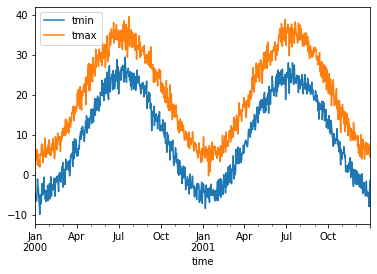

In [21]:
df.describe()
ds.mean(dim="location").to_dataframe().plot()

freeze = (ds["tmin"] <= 0).groupby("time.month").mean("time")
freeze

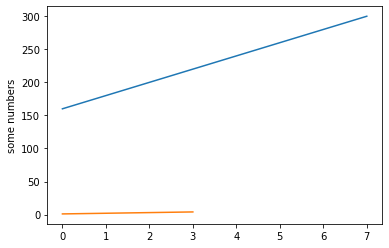

In [32]:
plt.plot(t_CLT)

plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()